In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [24]:
from utils import *

In [25]:
plt.rcParams['figure.figsize'] = (14,10)
font = {'family' : 'DejaVu Sans',  'weight' : 'normal',  'size'  : 22}
plt.rc('font', **font)

In [26]:
df = pd.read_csv('dataset.csv')

In [27]:
df["bboxes"] = df["bboxes"].apply(eval)

In [28]:
index = 90

In [29]:
img_path = df.filename[index]

In [30]:
bboxes = df.bboxes[index]

In [31]:
for b in bboxes:
    print(b)

[1429, 419, 1629, 613]
[331, 1092, 536, 1297]
[1404, 2495, 1604, 2689]
[2517, 2510, 2712, 2704]
[3535, 1816, 3735, 2011]


In [32]:
def visualize_bbox_with_df(df, index):
    """Visualizes a single bounding box on the image"""
    bboxes = df.bboxes[index]
    
    img = cv2.imread(df.filename[index])
    img = img.transpose(1,0,2)
    #img = np.fliplr(img)
    img = np.flipud(img)
    print(img.shape)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    for b in bboxes:
        cv2.rectangle(img, (b[0], b[1]), (b[2], b[3]), (100, 255, 200), 10)

        ((text_width, text_height), _) = cv2.getTextSize('Bolt', cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    

        #cv2.rectangle(img, (b[0], b[1] - int(1.3 * text_height)), (b[0] + text_width, b[1]), (255, 255, 255), -1)

        cv2.putText(
            img,
            text='Bolt',
            org=(b[0], b[1] - int(0.3 * text_height)),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=3, 
            color=(255, 255, 255), 
            thickness = 8,
            lineType=cv2.LINE_AA,
        )
    return img
        

(3024, 4032, 3)


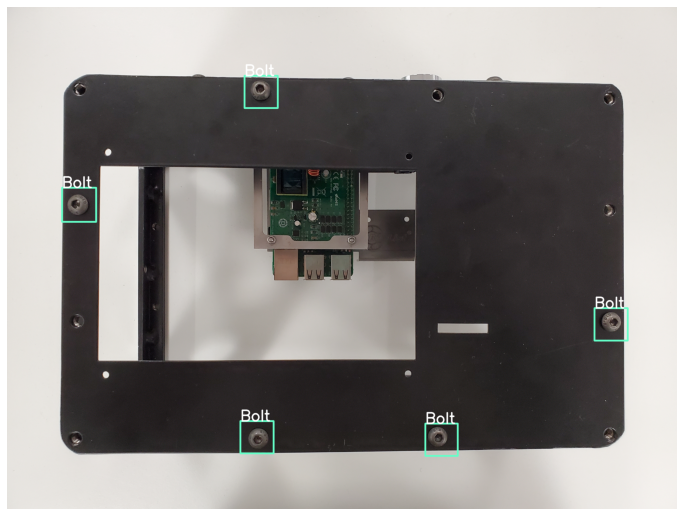

In [33]:
img = visualize_bbox_with_df(df, 90)
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img)
plt.show()

In [34]:
img_original = img.copy()

In [35]:
transform = A.Compose([
    #A.RandomSizedCrop(min_max_height=(1800, 2800), height=1524, width=1524, p=0.5),
    A.RGBShift(),
    A.Blur(),
    A.OneOf([
        A.HueSaturationValue(hue_shift_limit=0.2, sat_shift_limit= 0.2, 
                             val_shift_limit=0.2, p=0.9),
        A.RandomBrightnessContrast(brightness_limit=0.2, 
                                   contrast_limit=0.2, p=0.9),
    ],p=0.9),
    A.ToGray(p=0.01),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    #A.Resize(height=512, width=512, p=1),
    A.Cutout(num_holes=8, max_h_size=164, max_w_size=164, fill_value=0, p=0.5),
    A.Normalize(),
    ToTensorV2(),
], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['class_labels']))

In [36]:
index = 90

In [37]:
img = cv2.imread(df.filename[index])
img = img.transpose(1,0,2)
img = np.flipud(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

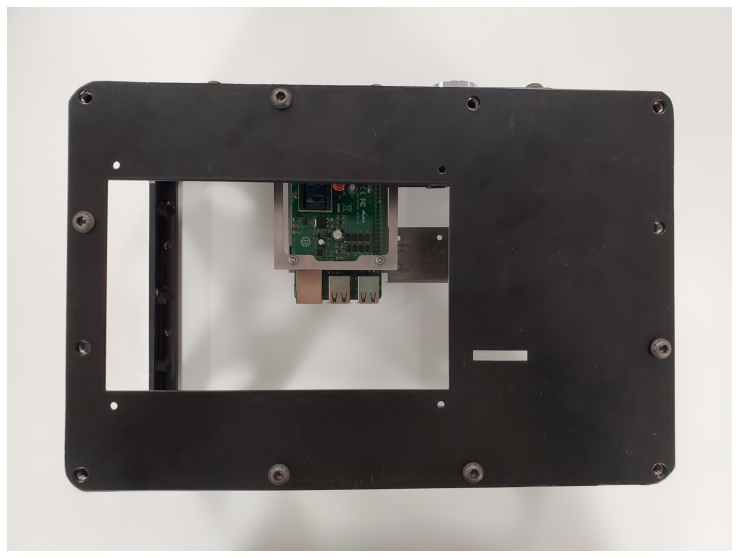

In [38]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [39]:
transformed = transform(image=img, bboxes=bboxes, class_labels=['Bolt']*len(bboxes))
transformed_image = transformed['image']
transformed_bboxes = transformed['bboxes']
transformed_class_labels = transformed['class_labels']

In [40]:
def visualize_bbox(img, bboxes):
    """Visualizes a single bounding box on the image"""
    for i in range(len(bboxes)):
        x_min, y_min, x_max, y_max = bboxes[i]
        
        cv2.rectangle(img, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (100, 255, 200), 10)

        ((text_width, text_height), _) = cv2.getTextSize('Bolt', cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    

        cv2.putText(
                img,
                text='Bolt',
                org=(int(x_min), int(y_min) - int(0.3 * text_height)),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=3, 
                color=(255, 255, 255), 
                thickness = 8,
                lineType=cv2.LINE_AA,
        )
    return img

In [47]:
img_aug = transformed['image']

In [55]:
transformed['bboxes']

[(1429.0, 418.99999999999994, 1629.0, 613.0),
 (331.0, 1092.0, 536.0, 1297.0),
 (1404.0, 2495.0, 1604.0, 2689.0),
 (2517.0, 2510.0, 2712.0, 2704.0),
 (3535.0, 1816.0000000000002, 3735.0, 2011.0000000000002)]

In [52]:
img = visualize_bbox(img_aug.cpu().permute(1,2,0).numpy(), transformed['bboxes'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


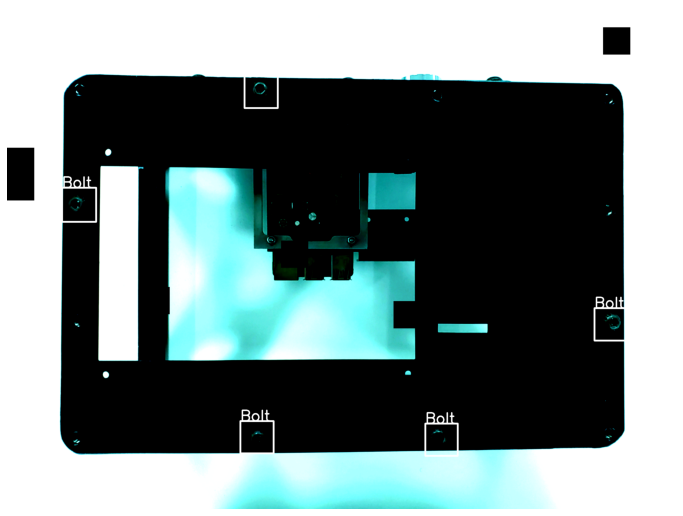

In [53]:
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


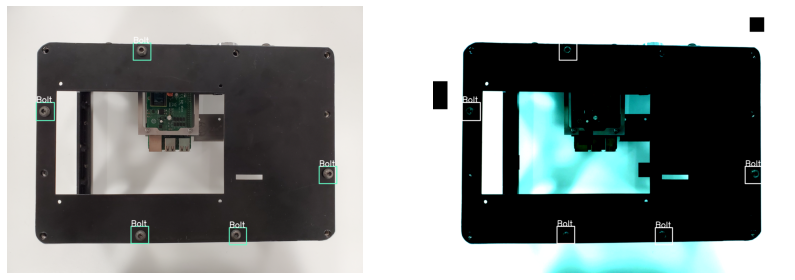

In [54]:
plt.subplot(1,2,1)
plt.imshow(img_original)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img)
plt.axis('off')
plt.show()